# SPDA SUMMATIVE ASSESSMENT QUESTION 2


## Webscrapping Using Foursquare API


### The neccesary libaries for this assigment is downlaoded

In [3]:
import pandas as pd
import numpy as np
import json #library to handle JSON files
import csv #library to handle CSV files
import requests
from bs4 import BeautifulSoup
import folium
print('libraries imported.')

libraries imported.


In [5]:
import requests
from bs4 import BeautifulSoup

# Send the GET request to the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_cities_in_the_United_Kingdom"
data = requests.get(url).text

# Parse the data from HTML into a BeautifulSoup object
soup = BeautifulSoup(data, 'html.parser')

# Create a list to store city data
cities_list = []

# Find the table that lists cities (class 'wikitable' for the table structure)
table = soup.find('table', {'class': 'wikitable'})

# Loop through each row in the table and extract the city names
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all('td')
    if len(cells) > 0:
        # The second column of the table contains the city name
        city = cells[1].get_text(strip=True)  
        cities_list.append(city)

# Create a DataFrame from the list of cities
cities_df = pd.DataFrame({"City": cities_list})

# Display the first few rows of the DataFrame
print(cities_df)


                        City
0                     London
1                     London
2              West Midlands
3   Yorkshire and the Humber
4                   Scotland
..                       ...
71          Northern Ireland
72                     Wales
73        South West England
74                     Wales
75                     Wales

[76 rows x 1 columns]


In [7]:
# Paste your user_id below
CLIENT_ID = 'E52Z4FQ2TCXGCYKNSTITCMVUSPWGRNFQEY1SC3KB2YYKOFGK' 
# Paste your token/password here
CLIENT_SECRET = 'BNGXZQ45E14OGGY5MS10XENF1JE3GIJMPHNH4NBECPBTFKUE'
# Add the current date 
VERSION = 20241109
# The radius of 500 meters
radius = 50000
# Extract 100 venues per location
LIMIT = 200

In [8]:
import requests
import pandas as pd

# Replace with your Foursquare API Key
API_KEY = 'fsq35nCNwv3KvH+yx6PumbUOoShohRCgucomGm3pnEMv92E='
url = 'https://api.foursquare.com/v3/places/search'

# Define the query parameters
params = {
    "query": "restaurant",
    "near": "United Kingdom",
    "limit": 50,   # Foursquare Places API limits to 50 per request
    "categories": "13065",  # Foursquare category ID for "Restaurant"
}

# Define the headers, including the API key
headers = {
    "Authorization": API_KEY,
    "Accept": "application/json"
}

# Function to make API requests and gather data
def get_restaurants_data():
    all_restaurants = []
    for offset in range(0, 200, 50):  # Fetch up to 200 results in batches of 50
        params["offset"] = offset
        response = requests.get(url, headers=headers, params=params)
        
        if response.status_code == 200:
            restaurants = response.json().get("results", [])
            all_restaurants.extend(restaurants)
        else:
            print(f"Error: {response.status_code}")
            break  # Stop if there is an error in the response
    
    return all_restaurants

# Extract data and process it into a DataFrame
restaurants_data = get_restaurants_data()

# Prepare DataFrame with the essential 12 columns
data = {
    "Name": [restaurant.get("name") for restaurant in restaurants_data],
    "Address": [restaurant.get("location", {}).get("address") for restaurant in restaurants_data],
    "Locality": [restaurant.get("location", {}).get("locality") for restaurant in restaurants_data],
    "Region": [restaurant.get("location", {}).get("region") for restaurant in restaurants_data],
    "Postal Code": [restaurant.get("location", {}).get("postcode") for restaurant in restaurants_data],
    "Country": [restaurant.get("location", {}).get("country") for restaurant in restaurants_data],
    "Latitude": [restaurant.get("geocodes", {}).get("main", {}).get("latitude") for restaurant in restaurants_data],
    "Longitude": [restaurant.get("geocodes", {}).get("main", {}).get("longitude") for restaurant in restaurants_data],
    "Category": [restaurant.get("categories")[0]["name"] if restaurant.get("categories") else None for restaurant in restaurants_data],
    "Distance (m)": [restaurant.get("distance", None) for restaurant in restaurants_data],
    
    # Add Review Count and Check-in Count
    "Review Count": [restaurant.get("stats", {}).get("totalReviews", 0) for restaurant in restaurants_data],
    "Check-in Count": [restaurant.get("stats", {}).get("checkinsCount", 0) for restaurant in restaurants_data],
}



## Load dataset into the dataframe


In [10]:
import pandas as pd

# Create a DataFrame with the extracted data
df_restaurants = pd.DataFrame(data)

# Display the data
print(df_restaurants)

#Save the DataFrame to a CSV file for later use
df_restaurants.to_csv("restaurants_with_reviews_and_checkins.csv", index=False)



                       Name                       Address  \
0    Apple Pie Eating House                      Rydal Rd   
1                 L'Enclume                  Cavendish St   
2                  Dabbawal               1 Brentwood Ave   
3        Riley's Fish Shack             King Edward's Bay   
4    The Seaview Restaurant               Lower Promenade   
..                      ...                           ...   
195                  Asha's              12-22 Newhall St   
196       The Drawing Board                 18 Newbold St   
197        The Orchard Cafe  Worcester Countryside Centre   
198       Lambs of Sheep St                   12 Sheep St   
199           Horse & Groom           Bourton on the Hill   

                 Locality               Region Postal Code Country   Latitude  \
0               Ambleside              Cumbria    LA22 9AN      GB  54.432846   
1                 Cartmel              Cumbria    LA11 6PZ      GB  54.201736   
2                 Jesmon

## Handling missing data


In [13]:
# Load your dataset
df = pd.read_csv('restaurants_with_reviews_and_checkins.csv')

total_missing = df.isnull().sum().sum()
print(f"Total missing values: {total_missing}")


Total missing values: 68


#### Remove the rows that has missing data

In [15]:
df.dropna(inplace=True)

#### Remove the column that has a percentage of 50% missing values

In [17]:
# Define the percentage threshold for missing values
missing_value_threshold = 0.5  # 50%

# Drop columns with more than 50% missing values
df.dropna(thresh=int(len(df) * (1 - missing_value_threshold)), axis=1, inplace=True)


#### Handling Outliers
##### The data showes no outliers

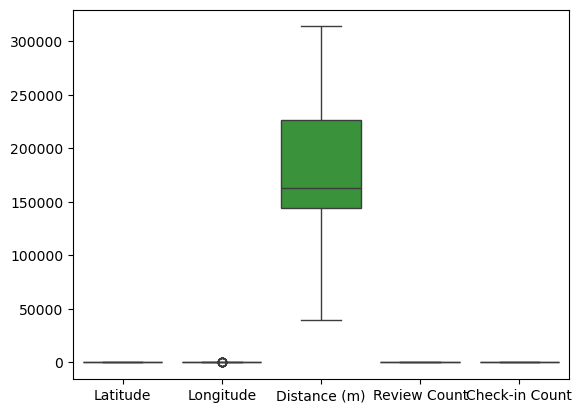

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot a boxplot for each column to spot outliers
sns.boxplot(data=df)
plt.show()

#### Additional step

###### Adding an index to the data set

In [23]:
df = df.reset_index(drop=True)

In [27]:
# Calculate mean for numeric columns in the DataFrame
mean_values = df.mean(numeric_only=True)
print(mean_values)

Latitude              54.012997
Longitude             -2.498530
Distance (m)      180367.205882
Review Count           0.000000
Check-in Count         0.000000
dtype: float64


In [29]:
# Calculate the mean for the "Distance (m)" column
mean_distance = df["Distance (m)"].mean()
print(f"Mean Distance: {mean_distance}")

Mean Distance: 180367.20588235295


In [31]:
total_distance = df["Distance (m)"].sum()
print(f"Total Distance: {total_distance}")

Total Distance: 24529940


In [37]:
# Calculate the range of the "Distance (m)" column
max_distance = df["Distance (m)"].max()
min_distance = df["Distance (m)"].min()
distance_range = max_distance - min_distance

print(f"Range of Distance: {distance_range}")

Range of Distance: 273730


In [51]:
min_distance = df["Distance (m)"].min()
max_distance = df["Distance (m)"].max()

In [45]:
correlation = df["Distance (m)"].corr(df["Check-in Count"])

C:\Users\Admin\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Admin\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [35]:
min_distance = df["Distance (m)"].min()
max_distance = df["Distance (m)"].max()